## Final Project Submission

Please fill out:
* Student name: Marvin Mills
* Student pace: part time
* Scheduled project review date/time: End of October
* Instructor name: Yish Lim
* Blog post URL:


In [27]:
# Your code here - remember to use markdown cells for comments as well!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

house_data = pd.read_csv('kc_house_data.csv')

In [2]:
house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
# For loop to sift through the unique values of select column, to get a better sense of the data.
# If unable to do this, then it quite possibly means the column's data has multiple datatypes.
# Also, this is a way to determine initially whether a variable is categorical, as well as check for NaN's.

def siftr(x):
    
    view_deets = house_data[x]
    storage = []

    for i in view_deets:
        if i in storage:
            continue
        elif i >= 0:
            storage.append(i)

    print(sorted(storage))

# house_data.columns
# to easily check the columns I want without scrolling up :)

In [23]:
siftr('has_waterfront')

[0.0, 1.0]


Initial Research:
--

After doing some research, it seems that it may be worth it to focus on renovations in some way shape or form.
<br>
<br>
Quality living space square footage seems to be a big draw, and the idea here is that if a home has a large amount of square footage AS WELL as modern renovations, it could represent a significant catalyst for house prices.
<br>
<br>
Furthermore, I'm wondering whether there is a way to understand home renovation together with the year a home was built. What this means is that if a home is very old, and has had a very recent renovation, could this particular home draw a higher price than a home built much later but with a much older renovation. In short: <b>what's the price power probability of a recent renovtion?</b>
<br>
<br>
Perhaps the <i>build-reno</i> score can accurately predict home prices?
<br>
<br>
For example:
Home built in 1920, renovation done in 2015 >>> 2015-1920 = 95
<br>
For every 1 step increase in build-reno, there is a significant jump in sales price.
<br>
<br>
Further, it could be interesting to compare this "score" with the grade found within the dataset assigned to each property.

---

BUSINESS CASE / PROBLEM:
--

In the decentralized finance world, fractional investment in tokenized real estate assets is in its infancy, but there is potential for this to transform the way we buy, sell and leverage real estate in the future. Homeowners are able to put up their homes as collateral by tokenizing the property and then receiving a loan, paid in the form of cryptocurrency up to a set amount, in relation to the housing price (better known as, LTV). Moreover, those interested in investing can purchase "parts" of a property, or "fractions," in much the same way crowdfund real estate works. Collective owners of a property can also decide whether to make upgrades or sell the property. <b>By allowing initial homeowners to take out a loan on their homes while also availing their asset to be invested in, there arises a need to have an accurate price forecast for home values before investment, and before taking a vote on which upgrades to do.</b> Having accurate house price predictions ensures that home owners who have taken out loans on their property properly collateralize their asset, so as to avoid a market fluctuation causing a liquidation event to occur and the owner potentially losing their real estate asset. As it relates to home upgrades, due to the highly diverse nature of the USA real estate market, blanket upgrade approaches are not sufficient. <b>Investors need a way to accurately predict after repair value of homes, with respect to region, especially because a significant amount of investors are outside of the USA.</b>

In [21]:
house_data.dtypes

id                  int64
date               object
price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
has_waterfront    float64
times_viewed      float64
condition           int64
grade               int64
sqft_above          int64
sqft_basement      object
yr_built            int64
yr_renovated      float64
zipcode             int64
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
dtype: object

In [96]:
# Changed a few column names so they better reflected what the data represents
house_data = house_data.rename(columns={"view":"times_viewed","waterfront":"has_waterfront"})

In [99]:
house_data = house_data.fillna(0)

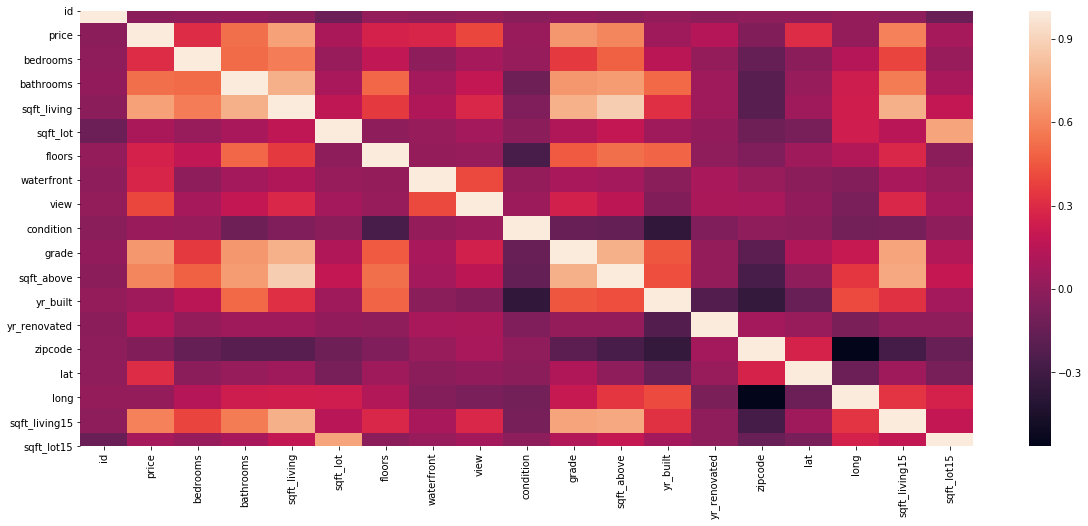

In [43]:
#checking on the correlation of the variables with a correlation matrix, for a quick eye test

f, ax = plt.subplots(figsize=(20, 8))
corr = house_data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Notes on Correlation Matrix:
--

Some basic observations after an eye test:

1. It appears that "sqft_living" and "sqft_above" have a fairly high correlation.
2. It also appears that "price" has the strongest correlation with "sqft_living," "grade," "sqft_above," and "sqft_living15."
3. It seems that bathrooms have a higher correlation to "sqft_living" than do bedrooms.

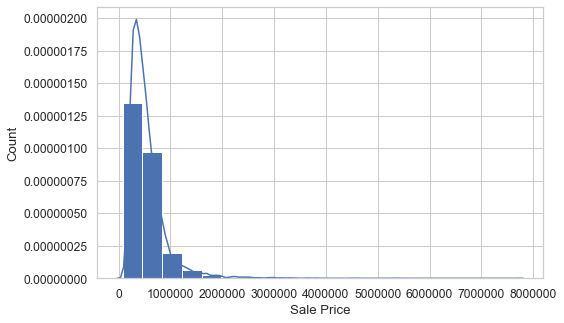

In [94]:
#Checking out the dependent variable which is the focus of the model.

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    house_data['price'], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count');